In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from kmodes.kmodes import KModes
from openpyxl import Workbook

In [2]:
#Initialise repositories
_projroot = os.path.abspath('.')
_datadir = os.path.join(_projroot, 'data')
_preprocesseddir = os.path.join(_datadir, 'preprocesseddata')
_experimentdir = os.path.join(_datadir, 'experiments')
_rawdir = os.path.join(_datadir, 'rawdata')
_src = os.path.join(_projroot,'src')
_sampling = os.path.join(_experimentdir,'sampling')
_geodata = os.path.join(_datadir,'geodata')

In [3]:
df_places = gpd.read_file(os.path.join(_geodata, 'Output_Areas.geojson'))

In [4]:
Ofcom = pd.read_csv(os.path.join(_preprocesseddir,'Ofcom_Combine.csv'))
Ofcom['Postcode'].astype(str)
print(Ofcom)

      Unnamed: 0 Postcode PC_Area  Target  Population aged 65+  \
0              0   NW14HB      NW       0                    4   
1              1   NW14LJ      NW       0                    7   
2              2   NW14NR      NW       1                    0   
3              3   NW14NT      NW       1                    0   
4              4   NW14NX      NW       1                    0   
...          ...      ...     ...     ...                  ...   
7850        7850  WC2R1BF      WC       0                    0   
7851        7851  WC2R3AA      WC       0                    0   
7852        7852  WC2R3AT      WC       0                    1   
7853        7853  WC2R3JE      WC       0                    0   
7854        7854  SW1X9HF      SW       1                    3   

      Females aged 65-69  Females aged 65+  Females aged 70-74  \
0                      0                 3                   1   
1                      1                 4                   1   
2        

In [5]:
Postcode_OA = pd.read_csv(os.path.join(_geodata,'postcode_OA.csv'))
Postcode_OA['Postcode'].astype(str)

0        NW13AU
1        NW14HB
2        NW14LJ
3        NW14LL
4        NW14NR
         ...   
7850    WC2R3DX
7851    WC2R3JE
7852    WC2R3JJ
7853    WC2R3LD
7854    WC2R3LL
Name: Postcode, Length: 7855, dtype: object

In [6]:
Ofcom = Ofcom.merge(Postcode_OA, on=['Postcode'], how = 'outer')

In [7]:
Ofcom = Ofcom.drop(['Unnamed: 0_x','Unnamed: 0_y', 'Postcode', 'PC_Area', 'Target'], axis =1)

print(Ofcom)

      Population aged 65+  Females aged 65-69  Females aged 65+  \
0                       4                   0                 3   
1                       7                   1                 4   
2                       0                   0                 0   
3                       0                   0                 0   
4                       0                   0                 0   
...                   ...                 ...               ...   
7850                    0                   0                 0   
7851                    0                   0                 0   
7852                    1                   1                 1   
7853                    0                   0                 0   
7854                    3                   1                 3   

      Females aged 70-74  Females aged 75-79  Females aged 80-84  \
0                      1                   1                   1   
1                      1                   1               

In [8]:
cont = list(set(list(Ofcom.select_dtypes(exclude=['object']).columns))-set(['Target']))
maxi = Ofcom[cont].max()
print(maxi)
Ofcom_norm = Ofcom
Ofcom_norm[cont] = Ofcom[cont]/maxi
print(Ofcom)
        

Males aged 80-84              6.0000
Females aged 65-69           14.0000
Mode Income              110000.0000
Mean Income               93700.0000
Lower Quartile            58780.4878
Males aged 95-99              3.0000
Males aged 65+               32.0000
Females aged 90-94            3.0000
Females aged 45-65           40.0000
Males aged 85-89             13.0000
Males aged 75-79              8.0000
Males aged 45-65             41.0000
Males aged 70-74              9.0000
Females aged 80-84            7.0000
Females aged under 25        52.0000
Females aged 70-74           12.0000
Males aged 100+               1.0000
Median Income             85000.0000
Males aged 90-94              9.0000
Males aged 65-69              8.0000
Females aged 65+             40.0000
Females aged 75-79            9.0000
Females aged 85-89            6.0000
Females aged 100+             1.0000
Males aged under 25          55.0000
Population aged 65+          72.0000
Females aged 25-44           80.0000
F

In [9]:
km = KModes(n_clusters=5, init='Huang', n_init=10, verbose=1)

clusters = km.fit_predict(Ofcom_norm)

# Print the cluster centroids
print(clusters)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1740, cost: 88733.0
Run 1, iteration: 2/100, moves: 642, cost: 88573.0
Run 1, iteration: 3/100, moves: 217, cost: 88571.0
Run 1, iteration: 4/100, moves: 1, cost: 88571.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 2481, cost: 90237.0
Run 2, iteration: 2/100, moves: 1082, cost: 89673.0
Run 2, iteration: 3/100, moves: 652, cost: 89126.0
Run 2, iteration: 4/100, moves: 207, cost: 89126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2056, cost: 87859.0
Run 3, iteration: 2/100, moves: 133, cost: 87855.0
Run 3, iteration: 3/100, moves: 10, cost: 87855.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3074, cost: 88166.0
Run 4, iteration: 2/100, moves: 742, cost: 87591.0
Run 4, iteratio

In [10]:
Clusters = pd.DataFrame((clusters), columns = ['Clusters'])
Clusters['OA11CD'] = Ofcom['OA11CD']

In [11]:
DigEx = Clusters.groupby('OA11CD').mean()

In [12]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
df_places[['Clusters']] = df_places[['Clusters']].fillna(value = 0)

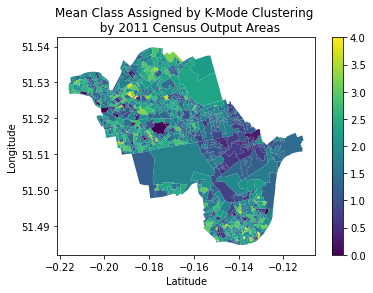

In [13]:
df_places.plot(column = 'Clusters', legend = True)
plt.title('Mean Class Assigned by K-Mode Clustering \n  by 2011 Census Output Areas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('Ofcom_Exclusion_loc.png', dpi = 600)

In [155]:
centroids = pd.DataFrame(km.cluster_centroids_, columns = Ofcom.columns)
centroids[cont] = centroids[cont].apply(pd.to_numeric)
print(Ofcom[cont].max())
centroids[cont] = centroids[cont].mul(maxi, axis = 1)
print(centroids)

Females aged 85-89       1.679616e+06
Females aged under 25    5.345973e+13
Males aged 45-65         7.984925e+12
Females aged 100+        1.000000e+00
Males aged 85-89         8.157307e+08
Females aged 65+         6.553600e+12
Females aged 45-65       6.553600e+12
Males aged 80-84         1.679616e+06
Males aged 25-44         3.596345e+15
Population aged 65+      7.222041e+14
Males aged 90-94         4.304672e+07
Males aged 95-99         6.561000e+03
Females aged 75-79       4.304672e+07
Females aged 90-94       6.561000e+03
Males aged 70-74         4.304672e+07
Females aged 70-74       4.299817e+08
Median Income            2.724905e+39
Males aged 65+           1.099512e+12
Females aged 25-44       1.677722e+15
Males aged 65-69         1.677722e+07
Females aged 65-69       1.475789e+09
Males aged 75-79         1.677722e+07
Males aged under 25      8.373394e+13
Mode Income              2.143589e+40
Lower Quartile           1.425166e+38
Females aged 80-84       5.764801e+06
Clusters    

In [16]:
Ofcom_Cluster = Ofcom

Ofcom_Cluster[cont] = Ofcom_Cluster[cont].apply(pd.to_numeric)
print(Ofcom[cont].max())
Ofcom_Cluster[cont] = Ofcom_Cluster[cont].mul(maxi, axis = 1)
Ofcom_Cluster['Clusters'] = clusters
Ofcom_Cluster['Clusters']

Males aged 80-84              6.0000
Females aged 65-69           14.0000
Mode Income              110000.0000
Mean Income               93700.0000
Lower Quartile            58780.4878
Males aged 95-99              3.0000
Males aged 65+               32.0000
Females aged 90-94            3.0000
Females aged 45-65           40.0000
Males aged 85-89             13.0000
Males aged 75-79              8.0000
Males aged 45-65             41.0000
Males aged 70-74              9.0000
Females aged 80-84            7.0000
Females aged under 25        52.0000
Females aged 70-74           12.0000
Males aged 100+               1.0000
Median Income             85000.0000
Males aged 90-94              9.0000
Males aged 65-69              8.0000
Females aged 65+             40.0000
Females aged 75-79            9.0000
Females aged 85-89            6.0000
Females aged 100+             1.0000
Males aged under 25          55.0000
Population aged 65+          72.0000
Females aged 25-44           80.0000
F

0       1
1       2
2       3
3       0
4       3
       ..
7850    0
7851    3
7852    1
7853    3
7854    3
Name: Clusters, Length: 7855, dtype: uint16

In [17]:
wb = Workbook()
wb.save(filename = os.path.join('ofcom_k-modes.xlsx'))

for i in range(0,8):
    df = Ofcom_Cluster.loc[Ofcom_Cluster['Clusters'] == i]
    with pd.ExcelWriter(os.path.join( 'ofcom_k-modes.xlsx'), engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name = 'cluster %s'%i)
       

In [70]:
imputed['OA11CD'] = WCC_Mob['OutputArea']

imputed = imputed.dropna(axis = 0)
print(imputed)

NameError: name 'WCC_Mob' is not defined

In [ ]:
df_places.plot(column = 'Clusters')

In [ ]:
Clusters = pd.DataFrame((clusters+1), columns = ['Clusters'])
print(Clusters)

In [ ]:
Clusters= Clusters.fillna(value = 0)

In [ ]:
Clusters['OA11CD'] = WCC_Mob['OutputArea']
print(Clusters)

In [ ]:
DigEx = Clusters.groupby('OA11CD').mean()

In [ ]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
df_places[['Clusters']] = df_places[['Clusters']].fillna(value = 0)

In [ ]:
df_places.plot(column = 'Clusters')

In [ ]:
WCC_Mob = pd.read_csv(os.path.join(_preprocesseddir, 'WCC_total_final_no_loc.csv')
WCC_Mob['OA11CD']=WCC_Mob['OutputArea']
print(WCC_Mob.head)
DigEx = WCC_Mob.groupby('OA11CD').mean()
DigEx.to_csv('Mob Exclusion OA.csv')

In [ ]:
df_places = df_places.merge(DigEx, on = ['OA11CD'], how = 'outer')
print(df_places)

KeyError: 'Target'

<Figure size 432x288 with 0 Axes>

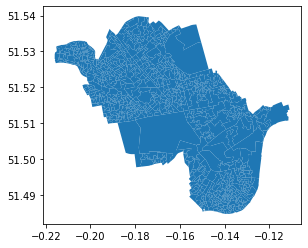

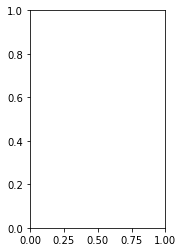

In [105]:
plt.figure()
df_places.plot()
df_places.plot(column = 'Target', legend = True, missing_kwds={
  "color": "lightgrey",
  "label": "Missing values",
})
plt.title('Mean Mobile Exclusion Across \n 2011 Census Output Areas')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.savefig('Mobile_Exclusion_loc.png', dpi = 600)

In [18]:
Cluster_1 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 1')
Cluster_0 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 0')
Cluster_2 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 2')
Cluster_3 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 3')
Cluster_4 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 4')
Cluster_5 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 5')
Cluster_6 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 6')
Cluster_7 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 7')
#Cluster_8 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 8')
#Cluster_9 = pd.read_excel('ofcom_k-modes.xlsx', sheet_name = 'cluster 9')


In [173]:
Cluster_1 = Cluster_1.drop('Unnamed:0', axis = 1)
Cluster_2 = Cluster_2.drop('Unnamed:0', axis = 1)
Cluster_3 = Cluster_3.drop('Unnamed:0', axis = 1)
Cluster_4 = Cluster_4.drop('Unnamed:0', axis = 1)
Cluster_0 = Cluster_0.drop('Unnamed:0', axis = 1)

KeyError: "['Unnamed:0'] not found in axis"

In [19]:
wb = Workbook()
wb.save(filename = os.path.join('ofcom_k-modes_description.xlsx'))
cluster = [Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7]
for i in cluster: 
    j = 0
    df = i.describe()
    with pd.ExcelWriter(os.path.join( 'ofcom_k-modes_description.xlsx'), engine="openpyxl", mode = 'a') as writer:
        df.to_excel(writer, sheet_name = 'cluster %s'%j)
    j+=1

In [180]:
Cluster_1 = pd.read_excel('ofcom_k-modes_description.xlsx', sheet_name = 'cluster 01',index_col = 'Unnamed: 0')
Cluster_0 = pd.read_excel('ofcom_k-modes_description.xlsx', sheet_name = 'cluster 0',index_col = 'Unnamed: 0')
Cluster_2 = pd.read_excel('ofcom_k-modes_description.xlsx', sheet_name = 'cluster 02',index_col = 'Unnamed: 0')
Cluster_3 = pd.read_excel('ofcom_k-modes_description.xlsx', sheet_name = 'cluster 03',index_col = 'Unnamed: 0')
Cluster_4 = pd.read_excel('ofcom_k-modes_description.xlsx', sheet_name = 'cluster 04',index_col = 'Unnamed: 0')
print(Cluster_4)

       Unnamed: 0.1       Target   Large User  Total households  \
count   1928.000000  1928.000000  1928.000000       1928.000000   
mean    4449.810685     0.191909     0.022822          2.117220   
std     1758.116301     0.393904     0.149373          6.666241   
min        5.000000     0.000000     0.000000          1.000000   
25%     3113.250000     0.000000     0.000000          1.000000   
50%     4396.500000     0.000000     0.000000          1.000000   
75%     5866.750000     0.000000     0.000000          1.000000   
max     7853.000000     1.000000     1.000000        114.000000   

       Population aged 65+      Females  Females aged 65-69  Females aged 65+  \
count          1928.000000  1928.000000         1928.000000       1928.000000   
mean              0.388485     1.565353            0.078320          0.256224   
std               2.753120     8.335772            0.500738          1.542584   
min               0.000000     0.000000            0.000000          0.0

In [181]:
descript = [Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4]

In [182]:
Target = np.array([])
Target_std = np.array([])
Wage = np.array([])
Wage_std = np.array([])
old = np.array([])
old_std = np.array([])

for item in descript:
    Target = np.append(Target, item.loc['mean','Target'])
    Target_std = np.append(Target_std, item.loc['std','Target'])
    Wage = np.append(Wage, item.loc['mean','Mean Income'])
    Wage_std = np.append(Wage_std, item.loc['std','Mean Income'])
    old = np.append(old, item.loc['mean', 'Population aged 65+'])
    old_std = np.append(old_std, item.loc['std', 'Population aged 65+'])

    print(Target, Wage)
    print(Target_std)
    
    

[0.11633282] [58763.02003082]
[0.32074718]
[0.11633282 0.08774584] [58763.02003082 56342.13306697]
[0.32074718 0.28303198]
[0.11633282 0.08774584 0.0417124 ] [58763.02003082 56342.13306697 49439.40714072]
[0.32074718 0.28303198 0.19998607]
[0.11633282 0.08774584 0.0417124  0.17643098] [58763.02003082 56342.13306697 49439.40714072 54489.76430976]
[0.32074718 0.28303198 0.19998607 0.38131483]
[0.11633282 0.08774584 0.0417124  0.17643098 0.19190871] [58763.02003082 56342.13306697 49439.40714072 54489.76430976
 50908.92116183]
[0.32074718 0.28303198 0.19998607 0.38131483 0.39390384]


In [183]:
print(np.shape(Target))
print(np.shape(Wage))

(5,)
(5,)


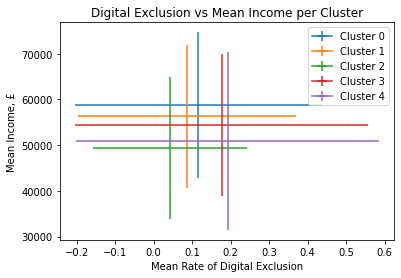

In [184]:
plt.figure()
for item in descript:
    plt.errorbar(item.loc['mean','Target'],item.loc['mean','Mean Income'],xerr = item.loc['std','Target'],yerr =item.loc['std','Mean Income'] )
plt.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
plt.xlabel('Mean Rate of Digital Exclusion')
plt.ylabel('Mean Income, £')
plt.title('Digital Exclusion vs Mean Income per Cluster')
plt.savefig('Income.png', dpi = 600)
plt.show()


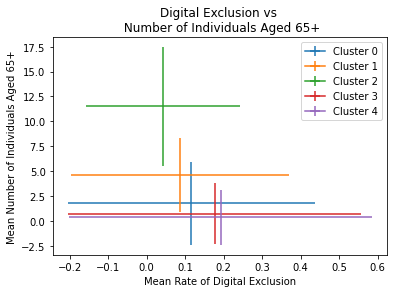

In [185]:
plt.figure()
for item in descript:
    plt.errorbar(item.loc['mean','Target'],item.loc['mean','Population aged 65+'],xerr = item.loc['std','Target'],yerr =item.loc['std','Population aged 65+'] )
plt.legend(['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4'])
plt.xlabel('Mean Rate of Digital Exclusion')
plt.ylabel('Mean Number of Individuals Aged 65+')
plt.title('Digital Exclusion vs \n Number of Individuals Aged 65+')
plt.savefig('Old.png', dpi = 600)
plt.show()
